<a href="https://colab.research.google.com/github/NestorColmenarez/BikeStore/blob/main/Python_Movie_Correlation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Untitled Folder/movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Percent Missing Data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [5]:
# Data cleaning
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# changing data types
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')
df['runtime'] = df['runtime'].fillna(0).astype('int64')

In [41]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,14
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,13
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,14
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,13
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,13


In [43]:
# Create correct year column
df['correctyear'] = df['released'].astype(str).str[0:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,1705
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,1492
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,1771
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,1492
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,1543


In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,Janu
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,Apri
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,Apri
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,Janu


In [10]:
pd.set_option('display.max_rows', None)

In [47]:
# Drop dupplicates
df['company'].drop_duplicates().sort_values(ascending=False).head()

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
Name: company, dtype: int16

In [12]:
# Budget/Gross correlation
# Company/Gross correlation

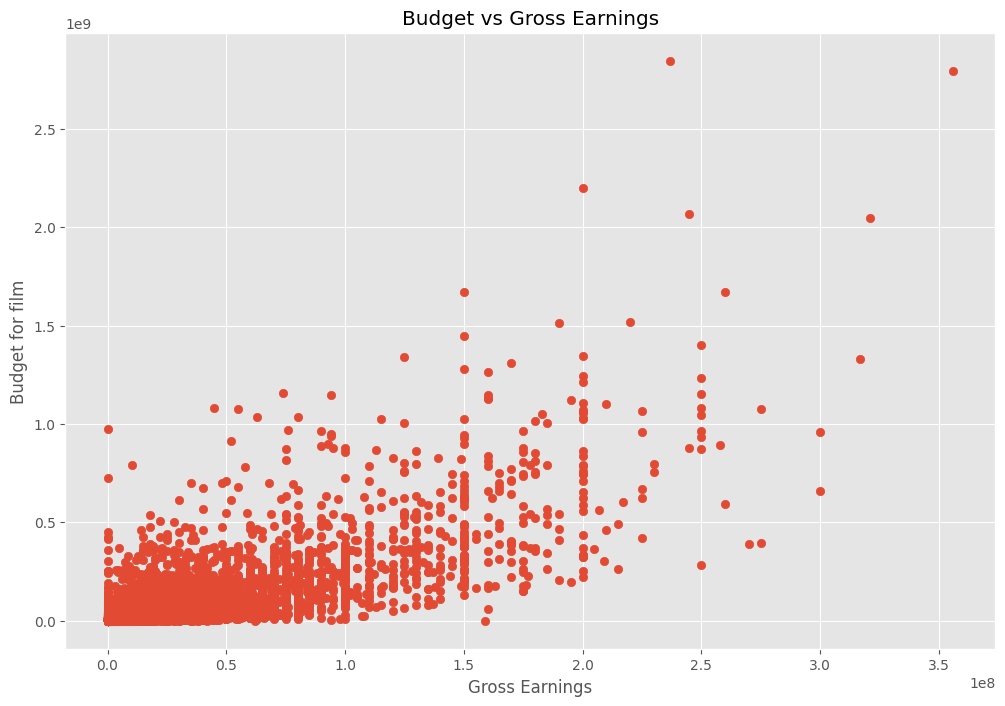

In [13]:
#Scatter plot Budget/Gross
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show()

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July


<Axes: xlabel='budget', ylabel='gross'>

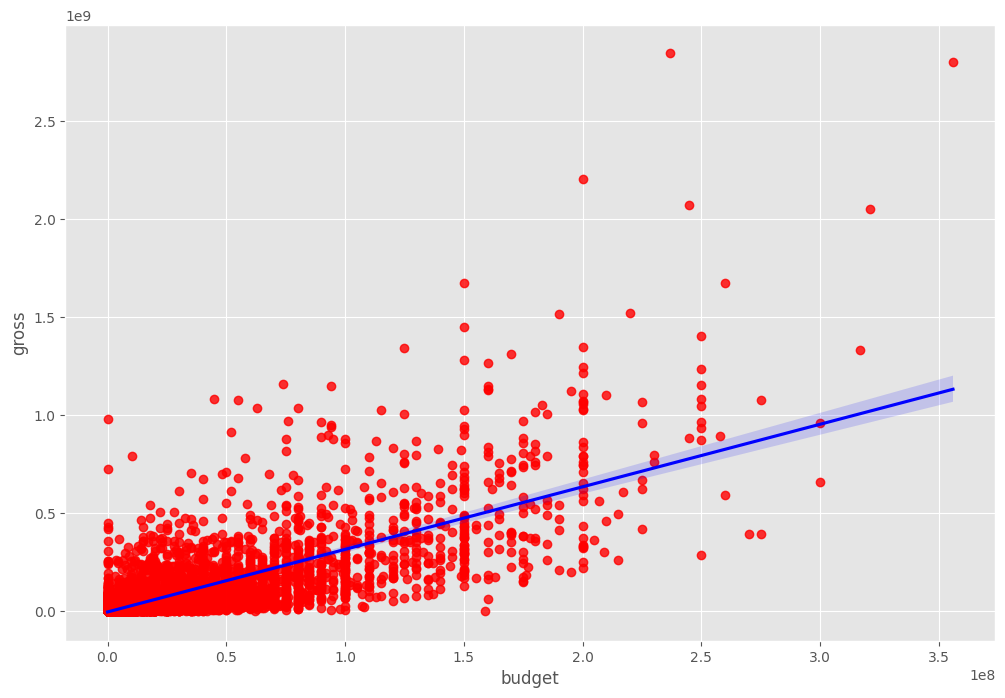

In [15]:
# Plot budget vs gross
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

In [16]:
# Correlation
df.corr(method="spearman") # pearson, kendall, spearman

<ipython-input-16-c2aceb8b8eaf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman") # pearson, kendall, spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.468107,0.291152,0.314681,0.141805
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.400394
votes,0.468107,0.428138,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007500,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.132569,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.400394,0.289359,0.246941,0.257478,1.000000


<ipython-input-17-0212f8e21746>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="pearson")


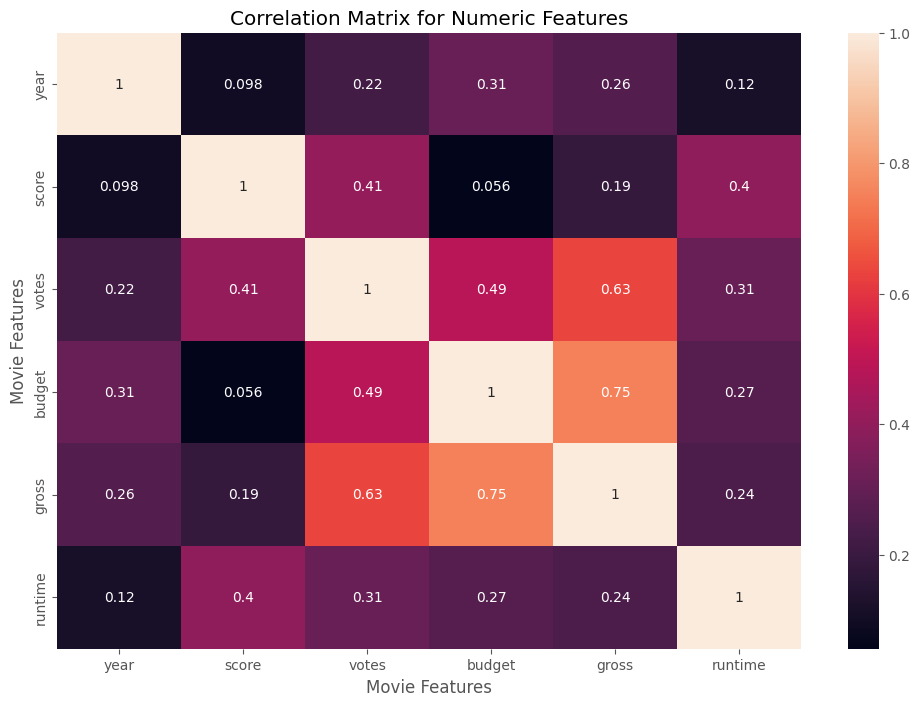

In [17]:
# Correlation matrix
correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [18]:
# Looking at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,July


In [44]:
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype ('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,6587,6,6,1980,1705,8.4,927000,2589,4014,1047,54,19000000,46998772,2319,146,787
1,5573,6,1,1980,1492,5.8,65000,2269,1632,327,55,4500000,58853106,731,104,550
2,5142,4,0,1980,1771,8.7,1200000,1111,2567,1745,55,18000000,538375067,1540,124,860
3,286,4,4,1980,1492,7.7,221000,1301,2000,2246,55,3500000,83453539,1812,88,550
4,1027,6,4,1980,1543,7.3,108000,1054,521,410,55,6000000,39846344,1777,98,607


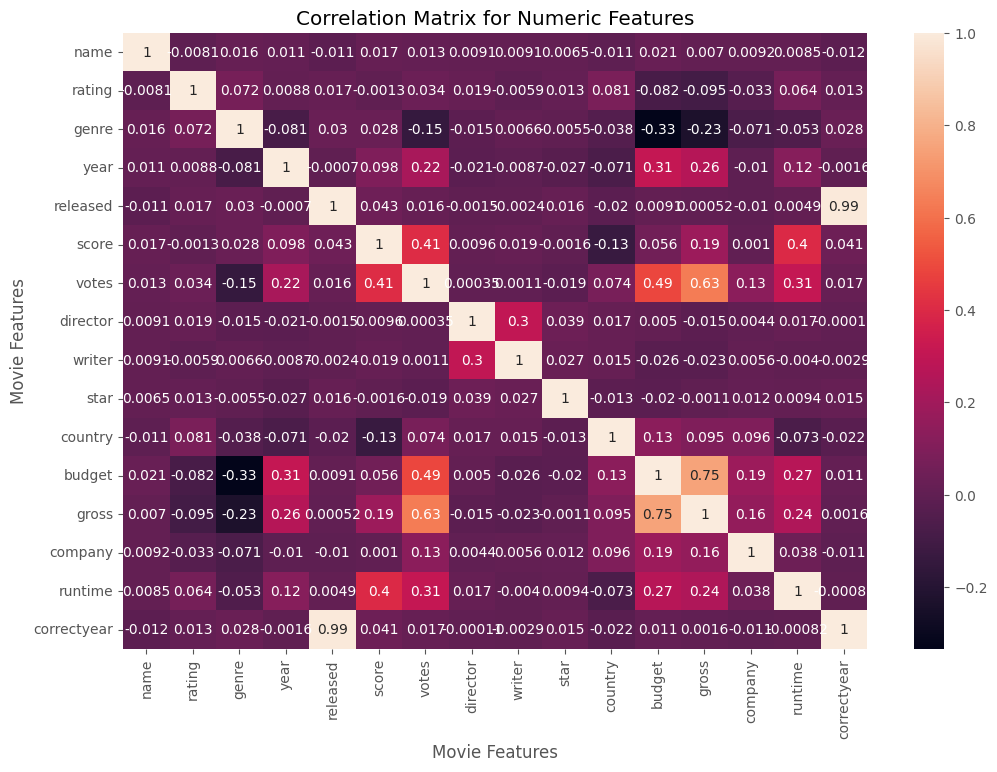

In [20]:
correlation_matrix = df_numerized.corr(method="pearson")

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [21]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,0.993694
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.398387,0.040993
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.409182,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.017107
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.000105
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.002892
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,0.015406


In [24]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             correctyear   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [27]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
             budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
year         star          -0.027242
s

In [40]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr

gross        votes          0.632870
votes        gross          0.632870
gross        budget         0.750157
budget       gross          0.750157
released     correctyear    0.993694
correctyear  released       0.993694
dtype: float64